In [0]:
import pandas as pd
import numpy as np
import datetime as datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,classification_report
from sklearn.utils import resample, shuffle
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
import xgboost
from datetime import datetime,date,time
import calendar
from sklearn import tree
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [205]:
df_visit = pd.read_csv('/content/visits_full.csv',index_col='Unnamed: 0')

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [206]:
df_visit[df_visit.duplicated(subset=None,keep='first')]

,Visit_ID,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time


In [207]:

df_visit.sort_values(by=['DateTime','Customer_ID','Sequence_Num']).head(15)

,Visit_ID,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time
1,1,2018-01-01 06:00:30,1,0,5079483,56
2,2,2018-01-01 06:00:30,1,3,5163263,201
3,3,2018-01-01 06:04:50,2,0,3,40
4,4,2018-01-01 06:46:50,3,1,5152724,10
5,5,2018-01-01 06:46:50,3,3,5079580,73
6,6,2018-01-01 07:28:20,4,2,2,168
7,7,2018-01-01 07:50:40,5,1,4,39
8,8,2018-01-01 07:56:50,6,1,3,27
9,9,2018-01-01 07:56:50,6,4,5080089,6
10,10,2018-01-01 08:28:40,7,3,2,9


In [0]:
df_visit['Sequence_Num_New'] = df_visit.groupby('Customer_ID').cumcount() + 1

In [209]:
df_visit.head()

,Visit_ID,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New
1,1,2018-01-01 06:00:30,1,0,5079483,56,1
2,2,2018-01-01 06:00:30,1,3,5163263,201,2
3,3,2018-01-01 06:04:50,2,0,3,40,1
4,4,2018-01-01 06:46:50,3,1,5152724,10,1
5,5,2018-01-01 06:46:50,3,3,5079580,73,2


In [0]:
df_visit = df_visit.drop(labels=['Visit_ID'],axis=1)

In [0]:
df_visit['DateTime'] = pd.to_datetime(df_visit['DateTime'])

In [0]:
df_visit['Day'] = df_visit['DateTime'].dt.weekday

In [0]:
df_visit['Month'] = df_visit['DateTime'].dt.month

In [214]:
df_visit['Customer_ID'].describe().apply(lambda x: format(x, 'f'))

count    1783546.000000
mean      222294.664479
std       153322.923759
min            1.000000
25%        86243.000000
50%       200715.500000
75%       347383.000000
max       534483.000000
Name: Customer_ID, dtype: object

In [215]:
df_visit['Customer_ID'].describe().apply(lambda x: format(x, 'f'))

count    1783546.000000
mean      222294.664479
std       153322.923759
min            1.000000
25%        86243.000000
50%       200715.500000
75%       347383.000000
max       534483.000000
Name: Customer_ID, dtype: object

In [216]:
df_visit.sort_values(by=['Store_ID','Customer_ID','Day','Month']).head(10)

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month
1092568,2018-04-17 08:19:10,26,6,1,14,16,1.0,4.0
970272,2018-04-03 11:02:50,55,20,1,12,19,1.0,4.0
413903,2018-02-08 09:26:10,93,20,1,49,50,3.0,2.0
1760558,2018-06-29 10:43:20,481,0,1,100,8,4.0,6.0
1584406,2018-06-10 14:06:40,836,4,1,89,19,6.0,6.0
1667402,2018-06-19 16:35:50,879,6,1,12,4,1.0,6.0
461758,2018-02-12 18:06:10,975,0,1,14,2,0.0,2.0
1427099,2018-05-22 13:46:10,1049,0,1,45,16,1.0,5.0
1619392,2018-06-14 20:42:40,1049,2,1,74,18,3.0,6.0
571018,2018-02-23 09:00:00,1049,3,1,65,11,4.0,2.0


In [0]:
df_visit['freq'] = df_visit.groupby('DateTime')['DateTime'].transform('count')

In [218]:
df_visit.head()

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq
1,2018-01-01 06:00:30,1,0,5079483,56,1,0.0,1.0,2.0
2,2018-01-01 06:00:30,1,3,5163263,201,2,0.0,1.0,2.0
3,2018-01-01 06:04:50,2,0,3,40,1,0.0,1.0,1.0
4,2018-01-01 06:46:50,3,1,5152724,10,1,0.0,1.0,2.0
5,2018-01-01 06:46:50,3,3,5079580,73,2,0.0,1.0,2.0


In [219]:
df_visit[df_visit['freq'].isna()]


,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq
1500432,NaT,464411,1,5080126,8,1,NaN,NaN,NaN
1500433,NaT,464411,1,9474122,6,2,NaN,NaN,NaN
1500434,NaT,464411,18,9713461,7,3,NaN,NaN,NaN


In [0]:
df_visit.drop(index =[1500432,1500433,1500434],axis=0,inplace=True)

In [0]:
df_visit_dupes = df_visit.sort_values(by=['DateTime','Customer_ID','Sequence_Num_New'])

In [0]:
df_visit_dupes['Next_Sequence'] = df_visit_dupes['Sequence_Num_New'].shift(-1)

In [0]:
df_visit_dupes['Next_Store'] = df_visit_dupes['Store_ID'].shift(-1)

In [224]:
df_visit_dupes.sort_values(by=['DateTime','Customer_ID','Sequence_Num_New']).head(12)

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq,Next_Sequence,Next_Store
1,2018-01-01 06:00:30,1,0,5079483,56,1,0.0,1.0,2.0,2.0,5163263.0
2,2018-01-01 06:00:30,1,3,5163263,201,2,0.0,1.0,2.0,1.0,3.0
3,2018-01-01 06:04:50,2,0,3,40,1,0.0,1.0,1.0,1.0,5152724.0
4,2018-01-01 06:46:50,3,1,5152724,10,1,0.0,1.0,2.0,2.0,5079580.0
5,2018-01-01 06:46:50,3,3,5079580,73,2,0.0,1.0,2.0,1.0,2.0
6,2018-01-01 07:28:20,4,2,2,168,1,0.0,1.0,1.0,1.0,4.0
7,2018-01-01 07:50:40,5,1,4,39,1,0.0,1.0,1.0,1.0,3.0
8,2018-01-01 07:56:50,6,1,3,27,1,0.0,1.0,2.0,2.0,5080089.0
9,2018-01-01 07:56:50,6,4,5080089,6,2,0.0,1.0,2.0,1.0,2.0
10,2018-01-01 08:28:40,7,3,2,9,1,0.0,1.0,1.0,1.0,5080089.0


In [225]:
df_visit_dupes.tail()

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq,Next_Sequence,Next_Store
1783542,2018-06-30 23:04:40,159748,9,5203456,10,32,5.0,6.0,3.0,7.0,9709631.0
1783543,2018-06-30 23:08:30,381731,2,9709631,17,7,5.0,6.0,1.0,16.0,5080089.0
1783544,2018-06-30 23:18:30,454772,7,5080089,6,16,5.0,6.0,1.0,3.0,5080089.0
1783545,2018-06-30 23:24:30,47673,4,5080089,31,3,5.0,6.0,1.0,7.0,9133379.0
1783546,2018-06-30 23:31:30,480890,3,9133379,6,7,5.0,6.0,1.0,NaN,NaN


In [0]:
df_visit_dupes.drop(index=1783546,axis=0,inplace=True)

In [0]:
df_visit_dupes['Next_Store']=df_visit_dupes['Next_Store'].astype(int)

In [0]:
df_visit_dupes['Target']= np.where(df_visit_dupes['Sequence_Num_New']>=df_visit_dupes['Next_Sequence'],0,df_visit_dupes['Next_Store'])
 

In [0]:
df_visit_dupes['Time'] = [datetime.time(d) for d in df_visit_dupes['DateTime']] 

In [0]:
df_visit_dupes = df_visit_dupes[df_visit_dupes['Time'] > time(10, 0, 0)]

In [0]:
df_visit_dupes = df_visit_dupes[df_visit_dupes['Time'] < time(21,0,0) ]

In [0]:
df_visit_dupes =  df_visit_dupes[df_visit_dupes['Dwell_Time'] < 200]

In [0]:
df_cat = pd.read_csv('/content/stores.csv')

In [0]:
df_cat.drop(columns=['Category_name','Name','Slot'],axis=1,inplace=True)

In [0]:
df_cat.drop_duplicates(inplace=True)

In [236]:
df_cat[df_cat['Category_ID'].isna()]

,Store_ID,Category_ID


In [0]:
df_visit_dupes = df_visit_dupes.merge(df_cat,how='inner', on='Store_ID')

In [238]:
df_cat.columns

Index(['Store_ID', 'Category_ID'], dtype='object')

In [239]:
df_visit_dupes.head()

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq,Next_Sequence,Next_Store,Target,Time,Category_ID
0,2018-01-01 10:03:50,26,3,9336555,35,1,0.0,1.0,2.0,2.0,5078501,5078501,10:03:50,14
1,2018-01-01 11:37:30,111,4,9336555,36,3,0.0,1.0,3.0,1.0,9467635,0,11:37:30,14
2,2018-01-01 12:34:30,218,6,9336555,55,1,0.0,1.0,1.0,1.0,9709631,0,12:34:30,14
3,2018-01-01 14:50:30,459,6,9336555,30,5,0.0,1.0,5.0,1.0,9399994,0,14:50:30,14
4,2018-01-01 17:22:30,737,6,9336555,30,1,0.0,1.0,4.0,2.0,7614638,7614638,17:22:30,14


In [0]:
df_visit_dupes_1 = df_visit_dupes.drop(columns=['DateTime','Sequence_Num','Next_Sequence','Next_Store'],axis=1)

In [0]:
df_visit_dupes.drop(columns='freq',axis=1,inplace=True)

In [59]:
df_visit_dupes.head(15)

,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,Target,Time,Category_ID
0,26,9336555,35,1,0.0,1.0,5078501,10:03:50,14
1,111,9336555,36,3,0.0,1.0,0,11:37:30,14
2,218,9336555,55,1,0.0,1.0,0,12:34:30,14
3,459,9336555,30,5,0.0,1.0,0,14:50:30,14
4,737,9336555,30,1,0.0,1.0,7614638,17:22:30,14
5,742,9336555,42,2,0.0,1.0,5079221,17:24:10,14
6,1377,9336555,33,2,1.0,1.0,5079256,10:11:10,14
7,1534,9336555,48,2,1.0,1.0,9608400,10:31:30,14
8,1566,9336555,37,1,1.0,1.0,9709631,10:34:50,14
9,1651,9336555,55,1,1.0,1.0,0,10:47:20,14


In [0]:
df_visit_1 = df_visit_dupes.drop(columns='Time',axis=1)

Now trying if cutomer leaves

In [0]:
df_exit = df_visit_dupes.copy()

In [62]:
df_exit

,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,Target,Category_ID
0,26,9336555,35,1,0.0,1.0,5078501,14
1,111,9336555,36,3,0.0,1.0,0,14
2,218,9336555,55,1,0.0,1.0,0,14
3,459,9336555,30,5,0.0,1.0,0,14
4,737,9336555,30,1,0.0,1.0,7614638,14
...,...,...,...,...,...,...,...,...
1684860,471311,5691963,7,1,6.0,6.0,5163351,20
1684861,204643,5691963,8,7,2.0,6.0,7965999,20
1684862,509377,5691963,8,1,3.0,6.0,7614638,20
1684863,485293,5691963,17,4,3.0,6.0,0,20


In [63]:
df_exit[df_exit.duplicated(subset=None, keep='first')]

,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,Target,Category_ID


In [0]:
df_exit['New_Target'] = np.where(df_exit['Target']==0,0,1)

In [0]:
df_exit.drop(columns='Target',axis=1,inplace=True)


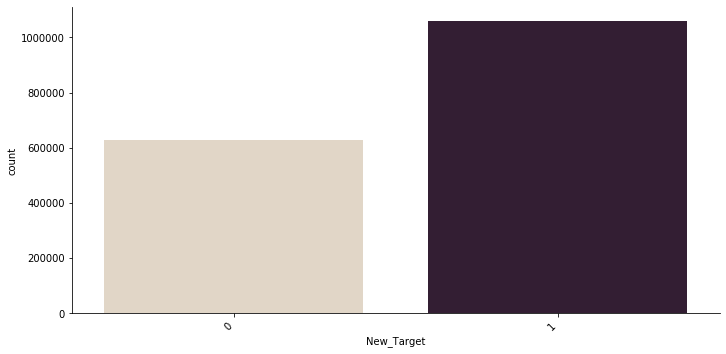

In [66]:
ax = sns.catplot(x="New_Target", kind="count", palette="ch:.25", data=df_exit,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

In [0]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=1)

for train_index, test_index in split.split(df_exit, df_exit['New_Target']):
  strat_train_exit = df_exit.iloc[train_index]
  strat_test_exit = df_exit.iloc[test_index]

In [68]:
from sklearn.utils import resample

df_majority = strat_train_exit[strat_train_exit['New_Target']==1]
df_minority = strat_train_exit[strat_train_exit['New_Target']==0]


df_majority_downsampled = resample(df_majority, 
                                 replace=False,     
                                 n_samples=len(df_minority),   
                                 random_state=42) 

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled.New_Target.value_counts()

1    501823
0    501823
Name: New_Target, dtype: int64

In [69]:
df_majority.New_Target.value_counts()

1    846069
Name: New_Target, dtype: int64

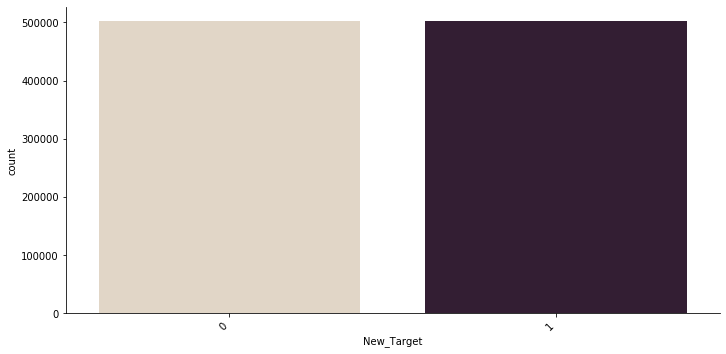

In [70]:
ax = sns.catplot(x="New_Target", kind="count", palette="ch:.25", data=df_downsampled,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

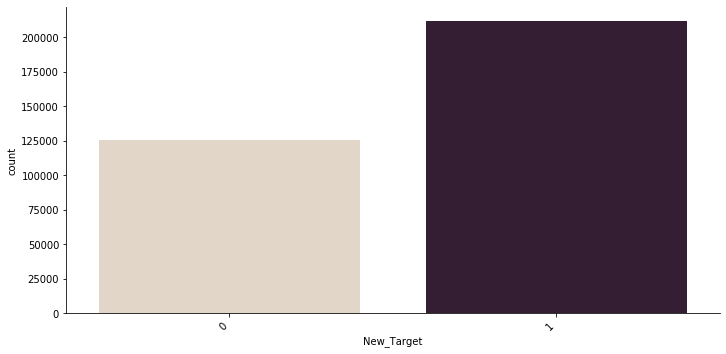

In [71]:
ax = sns.catplot(x="New_Target", kind="count", palette="ch:.25", data=strat_test_exit,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

In [0]:
df_downsampled = shuffle(df_downsampled)

In [73]:
df_downsampled

,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,Category_ID,New_Target
1362137,429922,5080038,15,1,0.0,5.0,10,1
738864,167400,9648532,6,1,6.0,2.0,20,1
89033,304853,2,21,3,6.0,3.0,8,0
1105455,502612,5080505,23,2,6.0,6.0,18,0
878529,159590,9598563,104,1,4.0,2.0,5,0
...,...,...,...,...,...,...,...,...
374031,58557,3,24,1,4.0,1.0,8,0
277812,522786,5080089,11,3,1.0,6.0,8,0
67295,189145,2,56,3,5.0,3.0,8,1
1343494,84693,5163221,13,1,3.0,1.0,8,1


In [0]:
X_train_exit = df_downsampled[['Day','Month','Dwell_Time','Store_ID','Sequence_Num_New','Customer_ID','Category_ID']]

In [75]:
X_train_exit

,Day,Month,Dwell_Time,Store_ID,Sequence_Num_New,Customer_ID,Category_ID
1362137,0.0,5.0,15,5080038,1,429922,10
738864,6.0,2.0,6,9648532,1,167400,20
89033,6.0,3.0,21,2,3,304853,8
1105455,6.0,6.0,23,5080505,2,502612,18
878529,4.0,2.0,104,9598563,1,159590,5
...,...,...,...,...,...,...,...
374031,4.0,1.0,24,3,1,58557,8
277812,1.0,6.0,11,5080089,3,522786,8
67295,5.0,3.0,56,2,3,189145,8
1343494,3.0,1.0,13,5163221,1,84693,8


In [0]:
y_train_exit = df_downsampled[['New_Target']]

In [0]:
X_test_exit = strat_test_exit[['Day','Month','Dwell_Time','Store_ID','Sequence_Num_New','Customer_ID','Category_ID'	]]

In [0]:
y_test_exit = strat_test_exit[['New_Target']]

In [79]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_depth=20,n_jobs=-1)
rnd_clf.fit(X_train_exit,y_train_exit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


KeyboardInterrupt: ignored

In [80]:

score = rnd_clf.score(X_train_exit, y_train_exit)
score2 = rnd_clf.score(X_test_exit, y_test_exit)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

NotFittedError: ignored

In [0]:
y_pred = rnd_clf.predict(X_test_exit)

In [0]:
confusion_matrix(y_test_exit,y_pred)

array([[ 75265,  50191],
       [ 80115, 131402]])

In [0]:
print(classification_report(y_test_exit,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.60      0.54    125456
           1       0.72      0.62      0.67    211517

    accuracy                           0.61    336973
   macro avg       0.60      0.61      0.60    336973
weighted avg       0.63      0.61      0.62    336973



In [0]:
df_stores = df_visit_dupes

In [83]:
df_stores

,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,Target,Category_ID
0,26,9336555,35,1,0.0,1.0,5078501,14
1,111,9336555,36,3,0.0,1.0,0,14
2,218,9336555,55,1,0.0,1.0,0,14
3,459,9336555,30,5,0.0,1.0,0,14
4,737,9336555,30,1,0.0,1.0,7614638,14
...,...,...,...,...,...,...,...,...
1684860,471311,5691963,7,1,6.0,6.0,5163351,20
1684861,204643,5691963,8,7,2.0,6.0,7965999,20
1684862,509377,5691963,8,1,3.0,6.0,7614638,20
1684863,485293,5691963,17,4,3.0,6.0,0,20


In [0]:
df_stores = df_stores[df_stores['Target']!=0]

In [85]:
df_stores.groupby('Target')['Target'].count().sort_values(ascending=False)

Target
2          104585
5080089     59671
5079256     53472
9709631     36645
5079942     17977
            ...  
9710341       413
9467441       339
8282348       199
6624025       120
5691963         8
Name: Target, Length: 199, dtype: int64

In [0]:
def conditions(x):
    if x == 2:
        return 1
    elif x == 5080089:
        return 2
    elif x == 5079256:
      return 3
    elif x == 9709631:
      return 4
    elif x == 5079942:
      return 5
    else:
        return 6

func = np.vectorize(conditions)
New_Target = func(df_stores["Target"])

In [87]:
df_stores['New_Target'] = New_Target

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
df_stores.drop(columns='Target',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
df_stores['New_Target'].unique()

array([6, 3, 4, 2, 1, 5])

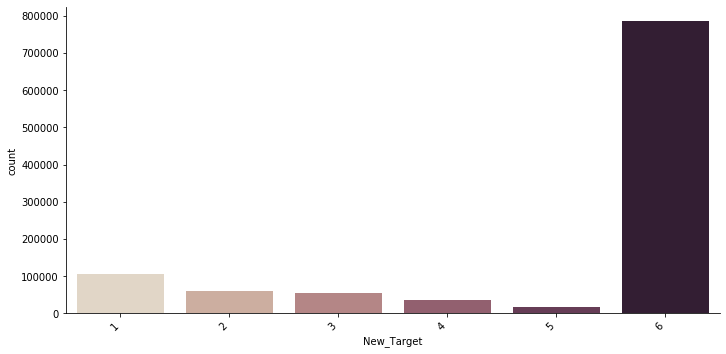

In [90]:
ax = sns.catplot(x="New_Target", kind="count", palette="ch:.25", data=df_stores,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

In [91]:
df_stores[df_stores.duplicated(subset=None,keep='first')]

,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,Category_ID,New_Target


In [0]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=1)

for train_index, test_index in split.split(df_stores, df_stores['New_Target']):
  strat_train_stores = df_stores.iloc[train_index]
  strat_test_stores = df_stores.iloc[test_index]

In [93]:
strat_train_stores

,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,Category_ID,New_Target
894669,76537,5079150,6,8,5.0,3.0,9,6
1281649,320634,9488233,7,3,5.0,3.0,6,6
1443935,86953,5078659,13,5,4.0,3.0,6,6
347474,428838,5079256,7,3,0.0,5.0,8,6
478733,7567,5078739,6,5,6.0,1.0,1,6
...,...,...,...,...,...,...,...,...
735253,416652,9416977,6,1,3.0,5.0,1,6
197184,163987,5080089,10,1,5.0,2.0,8,2
1450494,205969,9639775,13,1,3.0,2.0,20,6
381627,124458,3,8,2,6.0,1.0,8,6


In [0]:
df_majority = strat_train_stores[strat_train_stores['New_Target']==6]
df_minority = strat_train_stores[strat_train_stores['New_Target']==1]


df_majority_downsampled = resample(df_majority, 
                                 replace=False,     
                                 n_samples=len(df_minority),   
                                 random_state=42) 


In [0]:
strat_train_stores = pd.concat([df_majority_downsampled, strat_train_stores])

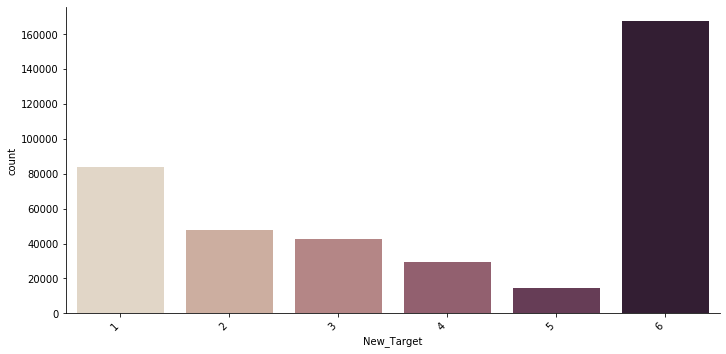

In [134]:
ax = sns.catplot(x="New_Target", kind="count", palette="ch:.25", data=strat_train_stores,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

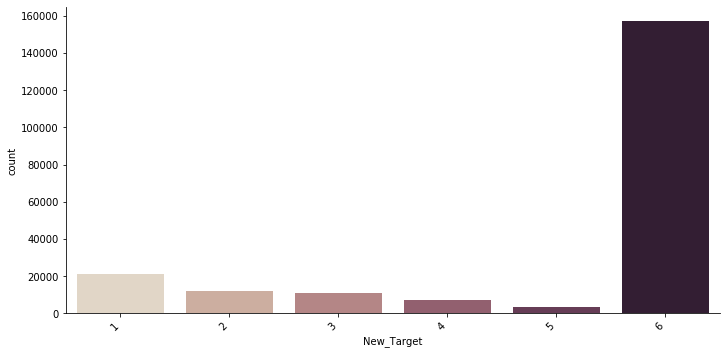

In [135]:
ax = sns.catplot(x="New_Target", kind="count", palette="ch:.25", data=strat_test_stores,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

Decision Tree

In [0]:
X_train_store = strat_train_stores[['Day','Month','Customer_ID','Dwell_Time','Store_ID','Sequence_Num_New','Category_ID']]

In [0]:
y_train_store = strat_train_stores[['New_Target']]

In [0]:
X_test_store = strat_test_stores[['Day','Month','Customer_ID','Dwell_Time','Store_ID','Sequence_Num_New','Category_ID']]

In [0]:
y_test_store = strat_test_stores[['New_Target']]

In [0]:
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=15)

In [0]:
clf = clf.fit(X_train_store,y_train_store)

In [0]:
y_pred_dt = clf.predict(X_test_store)

In [153]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_store, y_pred_dt)

array([[  5538,    599,    276,    586,    120,  13798],
       [  1052,   1448,    162,    240,     49,   8983],
       [   832,    289,    336,    103,     93,   9042],
       [   739,    154,     66,   1401,     62,   4907],
       [    90,     38,     25,     14,   2111,   1317],
       [ 12724,   4724,   2534,   2464,   1258, 133344]])

In [154]:
from sklearn.metrics import classification_report

print(classification_report(y_test_store, y_pred_dt))

              precision    recall  f1-score   support

           1       0.26      0.26      0.26     20917
           2       0.20      0.12      0.15     11934
           3       0.10      0.03      0.05     10695
           4       0.29      0.19      0.23      7329
           5       0.57      0.59      0.58      3595
           6       0.78      0.85      0.81    157048

    accuracy                           0.68    211518
   macro avg       0.37      0.34      0.35    211518
weighted avg       0.64      0.68      0.66    211518



In [155]:
from sklearn.metrics import accuracy_score
print("Accuracy = {:.2f}".format(accuracy_score(y_test_store, y_pred_dt)))

Accuracy = 0.68


In [156]:
X_train_store.head()

,Day,Month,Customer_ID,Dwell_Time,Store_ID,Sequence_Num_New,Category_ID
1505848,6.0,3.0,287061,20,9599523,2,4
1211339,0.0,4.0,324070,28,9399994,5,8
383431,5.0,2.0,86662,9,3,5,8
1437547,4.0,3.0,250520,39,9700978,2,14
143813,0.0,5.0,458538,24,2,1,8


In [157]:
y_pred_stores = rnd_clf_stores.predict(X_test_store)
print(classification_report(y_test_store,y_pred_stores))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.13      0.63      0.21     20917
           2       0.08      0.33      0.14     11934
           3       0.07      0.25      0.11     10695
           4       0.11      0.22      0.14      7329
           5       0.40      0.60      0.48      3595
           6       0.00      0.00      0.00    157048

    accuracy                           0.11    211518
   macro avg       0.13      0.34      0.18    211518
weighted avg       0.03      0.11      0.05    211518



In [0]:
rnd_clf_stores_2 = RandomForestClassifier(n_estimators=250, max_depth=20,n_jobs=-1,criterion='entropy')
rnd_clf_stores_2.fit(X_train_store,y_train_store)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
score = rnd_clf_stores_2.score(X_train_store, y_train_store)
score2 = rnd_clf_stores_2.score(X_test_store, y_test_store)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.867
Test set accuracy:  0.501


In [0]:
y_pred_stores = rnd_clf_stores_2.predict(X_test_store)
print(classification_report(y_test_store,y_pred_stores))

              precision    recall  f1-score   support

           1       0.17      0.49      0.25     20917
           2       0.14      0.19      0.16     11934
           3       0.09      0.12      0.10     10695
           4       0.24      0.21      0.22      7329
           5       0.55      0.61      0.58      3595
           6       0.80      0.56      0.66    157048

    accuracy                           0.50    211518
   macro avg       0.33      0.36      0.33    211518
weighted avg       0.64      0.50      0.55    211518



In [0]:
rnd_clf_stores_3 = RandomForestClassifier(n_estimators=250, max_depth=20,n_jobs=-1,criterion='entropy')
rnd_clf_stores_3.fit(X_train_store,y_train_store)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
score = rnd_clf_stores_3.score(X_train_store, y_train_store)
score2 = rnd_clf_stores_3.score(X_test_store, y_test_store)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.868
Test set accuracy:  0.499


In [0]:
y_pred_stores = rnd_clf_stores_3.predict(X_test_store)
print(classification_report(y_test_store,y_pred_stores))

              precision    recall  f1-score   support

           1       0.17      0.49      0.25     20917
           2       0.14      0.19      0.16     11934
           3       0.09      0.12      0.10     10695
           4       0.24      0.21      0.22      7329
           5       0.55      0.61      0.58      3595
           6       0.80      0.56      0.66    157048

    accuracy                           0.50    211518
   macro avg       0.33      0.36      0.33    211518
weighted avg       0.64      0.50      0.55    211518



In [240]:
df_visit_dupes

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq,Next_Sequence,Next_Store,Target,Time,Category_ID
0,2018-01-01 10:03:50,26,3,9336555,35,1,0.0,1.0,2.0,2.0,5078501,5078501,10:03:50,14
1,2018-01-01 11:37:30,111,4,9336555,36,3,0.0,1.0,3.0,1.0,9467635,0,11:37:30,14
2,2018-01-01 12:34:30,218,6,9336555,55,1,0.0,1.0,1.0,1.0,9709631,0,12:34:30,14
3,2018-01-01 14:50:30,459,6,9336555,30,5,0.0,1.0,5.0,1.0,9399994,0,14:50:30,14
4,2018-01-01 17:22:30,737,6,9336555,30,1,0.0,1.0,4.0,2.0,7614638,7614638,17:22:30,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684860,2018-06-03 15:15:40,471311,0,5691963,7,1,6.0,6.0,2.0,2.0,5163351,5163351,15:15:40,20
1684861,2018-06-20 18:32:40,204643,10,5691963,8,7,2.0,6.0,8.0,8.0,7965999,7965999,18:32:40,20
1684862,2018-06-21 14:14:20,509377,8,5691963,8,1,3.0,6.0,6.0,44.0,7614638,7614638,14:14:20,20
1684863,2018-06-21 16:16:50,485293,19,5691963,17,4,3.0,6.0,4.0,1.0,9625066,0,16:16:50,20


In [241]:

df_visit_dupes.sort_values(by=['DateTime','Customer_ID','Sequence_Num_New']).head(15)

,DateTime,Customer_ID,Sequence_Num,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq,Next_Sequence,Next_Store,Target,Time,Category_ID
0,2018-01-01 10:03:50,26,3,9336555,35,1,0.0,1.0,2.0,2.0,5078501,5078501,10:03:50,14
5782,2018-01-01 10:03:50,26,6,5078501,12,2,0.0,1.0,2.0,1.0,2,0,10:03:50,3
11062,2018-01-01 10:05:40,27,2,2,44,1,0.0,1.0,1.0,1.0,5080089,0,10:05:40,8
172783,2018-01-01 10:06:00,28,0,5080089,33,1,0.0,1.0,1.0,1.0,5079256,0,10:06:00,8
280983,2018-01-01 10:08:50,29,0,5079256,27,1,0.0,1.0,2.0,2.0,5080089,5080089,10:08:50,8
172784,2018-01-01 10:08:50,29,3,5080089,174,2,0.0,1.0,2.0,1.0,3,0,10:08:50,8
369070,2018-01-01 10:10:50,30,0,3,9,1,0.0,1.0,2.0,2.0,9709631,9709631,10:10:50,8
385707,2018-01-01 10:10:50,30,3,9709631,17,2,0.0,1.0,2.0,1.0,5080097,0,10:10:50,8
445411,2018-01-01 10:11:20,31,2,5080097,44,1,0.0,1.0,2.0,2.0,5079256,5079256,10:11:20,15
280984,2018-01-01 10:11:20,31,5,5079256,19,2,0.0,1.0,2.0,1.0,5080089,0,10:11:20,8


In [0]:
df_visit_dupes.drop(columns='Sequence_Num' , axis=1,inplace=True)

In [0]:
df_visit_dupes = df_visit_dupes.sort_values(by=['DateTime','Customer_ID','Sequence_Num_New'])

In [244]:
df_visit_dupes

,DateTime,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq,Next_Sequence,Next_Store,Target,Time,Category_ID
0,2018-01-01 10:03:50,26,9336555,35,1,0.0,1.0,2.0,2.0,5078501,5078501,10:03:50,14
5782,2018-01-01 10:03:50,26,5078501,12,2,0.0,1.0,2.0,1.0,2,0,10:03:50,3
11062,2018-01-01 10:05:40,27,2,44,1,0.0,1.0,1.0,1.0,5080089,0,10:05:40,8
172783,2018-01-01 10:06:00,28,5080089,33,1,0.0,1.0,1.0,1.0,5079256,0,10:06:00,8
280983,2018-01-01 10:08:50,29,5079256,27,1,0.0,1.0,2.0,2.0,5080089,5080089,10:08:50,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172781,2018-06-30 20:58:00,534445,2,7,1,5.0,6.0,2.0,2.0,5079256,5079256,20:58:00,8
369069,2018-06-30 20:58:00,534445,5079256,7,2,5.0,6.0,2.0,29.0,5080046,5080046,20:58:00,8
661894,2018-06-30 20:58:20,192166,5080046,14,29,5.0,6.0,1.0,1.0,5079281,0,20:58:20,4
585030,2018-06-30 20:59:30,534446,5079281,81,1,5.0,6.0,1.0,14.0,2,2,20:59:30,8


In [0]:
def conditions(x):
    if x == 2:
        return 1
    elif x == 5080089:
        return 2
    elif x == 5079256:
      return 3
    elif x == 9709631:
      return 4
    elif x == 5079942:
      return 5
    else:
        return 6

func = np.vectorize(conditions)
New_Target = func(df_visit_dupes["Store_ID"])

In [0]:
df_visit_dupes['Store_ID'] = New_Target

In [247]:
df_visit_dupes

,DateTime,Customer_ID,Store_ID,Dwell_Time,Sequence_Num_New,Day,Month,freq,Next_Sequence,Next_Store,Target,Time,Category_ID
0,2018-01-01 10:03:50,26,6,35,1,0.0,1.0,2.0,2.0,5078501,5078501,10:03:50,14
5782,2018-01-01 10:03:50,26,6,12,2,0.0,1.0,2.0,1.0,2,0,10:03:50,3
11062,2018-01-01 10:05:40,27,1,44,1,0.0,1.0,1.0,1.0,5080089,0,10:05:40,8
172783,2018-01-01 10:06:00,28,2,33,1,0.0,1.0,1.0,1.0,5079256,0,10:06:00,8
280983,2018-01-01 10:08:50,29,3,27,1,0.0,1.0,2.0,2.0,5080089,5080089,10:08:50,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172781,2018-06-30 20:58:00,534445,1,7,1,5.0,6.0,2.0,2.0,5079256,5079256,20:58:00,8
369069,2018-06-30 20:58:00,534445,3,7,2,5.0,6.0,2.0,29.0,5080046,5080046,20:58:00,8
661894,2018-06-30 20:58:20,192166,6,14,29,5.0,6.0,1.0,1.0,5079281,0,20:58:20,4
585030,2018-06-30 20:59:30,534446,6,81,1,5.0,6.0,1.0,14.0,2,2,20:59:30,8


In [0]:
def conditions(x):
    if x == 2:
        return 1
    elif x == 5080089:
        return 2
    elif x == 5079256:
      return 3
    elif x == 9709631:
      return 4
    elif x == 5079942:
      return 5
    elif x == 0:
      return 0
    else:
      return 6

func = np.vectorize(conditions)
New_Target = func(df_visit_dupes["Target"])

In [0]:
df_visit_dupes['Target'] = New_Target

In [0]:
df_one_hot = pd.get_dummies(df_visit_dupes['Store_ID'])

In [0]:
df_visit_dupes= df_visit_dupes.join(df_one_hot)

In [0]:
df_visit_one_hot = df_visit_dupes

In [253]:
df_visit_one_hot.columns

Index([        'DateTime',      'Customer_ID',         'Store_ID',
             'Dwell_Time', 'Sequence_Num_New',              'Day',
                  'Month',             'freq',    'Next_Sequence',
             'Next_Store',           'Target',             'Time',
            'Category_ID',                  1,                  2,
                        3,                  4,                  5,
                        6],
      dtype='object')

In [0]:
df_visit_one_hot = df_visit_one_hot[[           'Customer_ID',         'Store_ID',
             'Dwell_Time',             'Day', 'Sequence_Num_New', 'Category_ID',
                  'Month',               
                                  
                        1,                  2,                  3,
                        4,                  5,                  6, 'Target']]

In [255]:
df_visit_one_hot

,Customer_ID,Store_ID,Dwell_Time,Day,Sequence_Num_New,Category_ID,Month,1,2,3,4,5,6,Target
0,26,6,35,0.0,1,14,1.0,0,0,0,0,0,1,6
5782,26,6,12,0.0,2,3,1.0,0,0,0,0,0,1,0
11062,27,1,44,0.0,1,8,1.0,1,0,0,0,0,0,0
172783,28,2,33,0.0,1,8,1.0,0,1,0,0,0,0,0
280983,29,3,27,0.0,1,8,1.0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172781,534445,1,7,5.0,1,8,6.0,1,0,0,0,0,0,3
369069,534445,3,7,5.0,2,8,6.0,0,0,1,0,0,0,6
661894,192166,6,14,5.0,29,4,6.0,0,0,0,0,0,1,0
585030,534446,6,81,5.0,1,8,6.0,0,0,0,0,0,1,1


In [0]:
df_visit_one_hot_no_zero = df_visit_one_hot[df_visit_one_hot['Target']!=0]

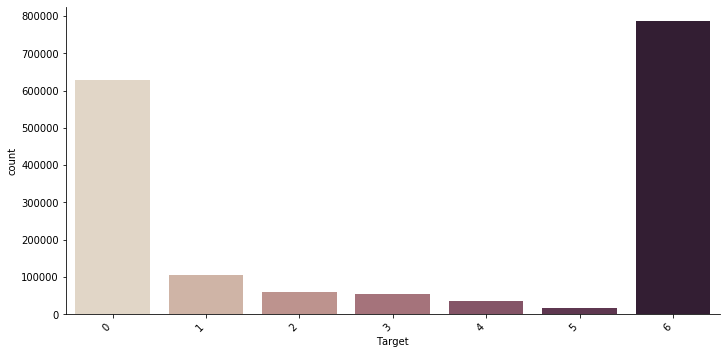

In [0]:
ax = sns.catplot(x="Target", kind="count", palette="ch:.25", data=df_visit_one_hot,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

In [0]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=1)

for train_index, test_index in split.split(df_visit_one_hot_no_zero, df_visit_one_hot_no_zero['Target']):
  strat_train_stores = df_visit_one_hot_no_zero.iloc[train_index]
  strat_test_stores = df_visit_one_hot_no_zero.iloc[test_index]

NameError: ignored

In [0]:
df_majority = strat_train_stores[strat_train_stores['Target']==6]
df_minority = strat_train_stores[strat_train_stores['Target']==1]


df_majority_downsampled = resample(df_majority, 
                                 replace=False,     
                                 n_samples=len(df_minority),   
                                 random_state=42) 

In [0]:
strat_train_stores = strat_train_stores[strat_train_stores['Target']!=6]

In [0]:
strat_train_stores = pd.concat([df_majority_downsampled, strat_train_stores])

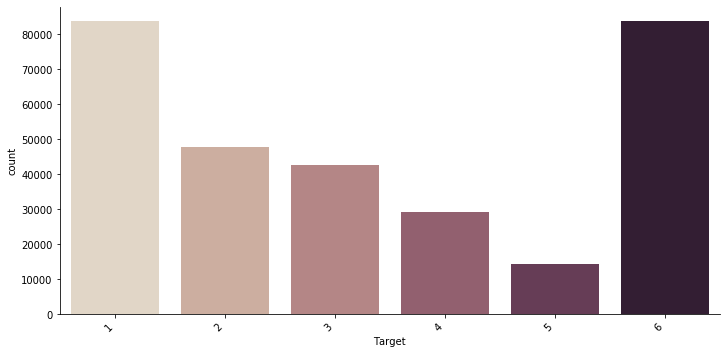

In [0]:
ax = sns.catplot(x="Target", kind="count", palette="ch:.25", data=strat_train_stores,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

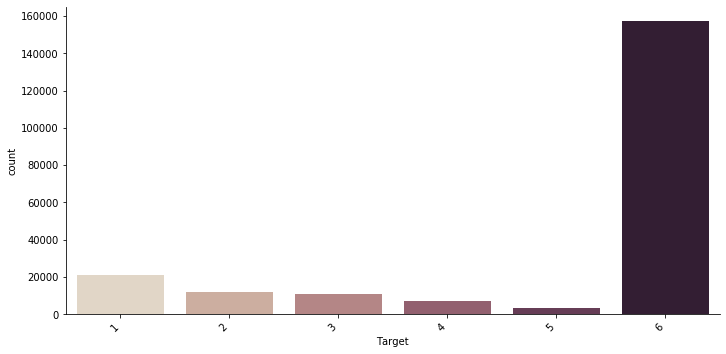

In [0]:
ax = sns.catplot(x="Target", kind="count", palette="ch:.25", data=strat_test_stores,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

In [0]:
strat_train_stores

NameError: ignored

In [0]:
X_train_store = strat_train_stores[['Day','Month','Customer_ID','Sequence_Num_New','Dwell_Time','Category_ID', 1,2,3,4,5,6]]

In [0]:
y_train_store = strat_train_stores[['Target']]

In [0]:
X_test_store = strat_test_stores[['Day','Month','Customer_ID','Sequence_Num_New','Dwell_Time','Category_ID', 1,2,3,4,5,6]]

In [0]:
y_test_store = strat_test_stores[['Target']]

In [0]:
rnd_clf_stores = RandomForestClassifier(n_estimators=200, max_depth=15,n_jobs=-1,random_state=5)
rnd_clf_stores.fit(X_train_store,y_train_store)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [0]:
core = rnd_clf_stores.score(X_train_store, y_train_store)
score2 = rnd_clf_stores.score(X_test_store, y_test_store)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.868
Test set accuracy:  0.526


In [0]:
y_pred_stores = rnd_clf_stores.predict(X_test_store)
print(classification_report(y_test_store,y_pred_stores))

              precision    recall  f1-score   support

           1       0.15      0.46      0.23     20917
           2       0.11      0.08      0.09     11934
           3       0.11      0.07      0.09     10695
           4       0.22      0.19      0.20      7329
           5       0.58      0.61      0.60      3595
           6       0.78      0.61      0.69    157048

    accuracy                           0.53    211518
   macro avg       0.33      0.34      0.32    211518
weighted avg       0.63      0.53      0.56    211518



,Day,Month,Customer_ID,Sequence_Num_New,Dwell_Time,Store_ID,1,2,3,4,5,6
136845,3.0,1.0,56531,1,10,6,0,0,0,0,0,1
1196774,5.0,4.0,86208,9,10,2,0,1,0,0,0,0
1216036,6.0,4.0,78409,10,7,6,0,0,0,0,0,1
1554849,3.0,6.0,478238,1,6,6,0,0,0,0,0,1
125854,2.0,1.0,52030,1,42,6,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
357916,4.0,2.0,138209,1,12,6,0,0,0,0,0,1
541204,6.0,2.0,197925,1,20,6,0,0,0,0,0,1
484208,3.0,2.0,179306,2,15,1,1,0,0,0,0,0
383236,6.0,2.0,116449,4,14,6,0,0,0,0,0,1


In [256]:
df_visit_one_hot.sort_values(by=['Day','Month','Customer_ID','Sequence_Num_New'])

,Customer_ID,Store_ID,Dwell_Time,Day,Sequence_Num_New,Category_ID,Month,1,2,3,4,5,6,Target
756202,25,6,8,0.0,2,3,1.0,0,0,0,0,0,1,0
0,26,6,35,0.0,1,14,1.0,0,0,0,0,0,1,6
5782,26,6,12,0.0,2,3,1.0,0,0,0,0,0,1,0
11062,27,1,44,0.0,1,8,1.0,1,0,0,0,0,0,0
172783,28,2,33,0.0,1,8,1.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443372,520178,4,78,6.0,1,8,6.0,0,0,0,1,0,0,2
168069,520179,1,174,6.0,1,8,6.0,1,0,0,0,0,0,0
1007075,520180,6,18,6.0,1,19,6.0,0,0,0,0,0,1,1
277101,520181,2,16,6.0,1,8,6.0,0,1,0,0,0,0,6


In [0]:

df_history = df_visit_one_hot.groupby(by=['Day','Month','Customer_ID'])[1,2,3,4,5,6].cumsum(axis=0)

In [258]:
df_visit_one_hot.drop(columns=[1,2,3,4,5,6],axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
df_one_hot_comb = df_visit_one_hot.merge(df_history,how='inner',left_index=True,right_index=True)

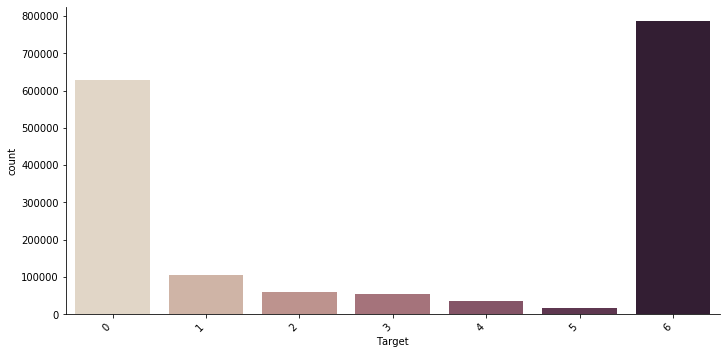

In [260]:
ax = sns.catplot(x="Target", kind="count", palette="ch:.25", data=df_one_hot_comb,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

In [0]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=1)

for train_index, test_index in split.split(df_one_hot_comb, df_one_hot_comb['Target']):
  strat_train_stores = df_one_hot_comb.iloc[train_index]
  strat_test_stores = df_one_hot_comb.iloc[test_index]

In [262]:
strat_train_stores

,Customer_ID,Store_ID,Dwell_Time,Day,Sequence_Num_New,Category_ID,Month,Target,1,2,3,4,5,6
1597976,70458,6,9,6.0,1,3,1.0,1,0,0,0,0,0,1
1574072,336956,6,74,5.0,1,5,4.0,1,0,0,0,0,0,1
426546,401331,4,82,3.0,1,8,5.0,2,0,0,0,1,0,0
551380,111142,6,32,3.0,1,8,1.0,0,0,0,0,0,0,1
1106104,9409,6,6,2.0,1,8,1.0,6,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317434,75189,6,50,1.0,4,7,2.0,6,0,0,0,0,0,1
989277,121047,6,13,3.0,3,4,2.0,6,0,0,0,0,0,2
680276,333811,6,7,4.0,2,14,4.0,0,0,0,0,0,0,2
1269844,212845,6,24,5.0,7,3,2.0,6,1,0,0,1,0,5


In [0]:
df_majority = strat_train_stores[strat_train_stores['Target']==6]
df_minority = strat_train_stores[strat_train_stores['Target']==1]


df_majority_6_downsampled = resample(df_majority, 
                                 replace=False,     
                                 n_samples=len(df_minority),   
                                 random_state=42) 

In [0]:
df_majority = strat_train_stores[strat_train_stores['Target']==0]
df_minority = strat_train_stores[strat_train_stores['Target']==1]


df_majority_0_downsampled = resample(df_majority, 
                                 replace=False,     
                                 n_samples=len(df_minority),   
                                 random_state=42) 

In [0]:
strat_train_stores = strat_train_stores[strat_train_stores['Target']!=6]

In [0]:
strat_train_stores = strat_train_stores[strat_train_stores['Target']!=0]

In [0]:
strat_train_stores = pd.concat([df_majority_0_downsampled, strat_train_stores,df_majority_6_downsampled])

In [0]:
strat_train_stores = shuffle(strat_train_stores)

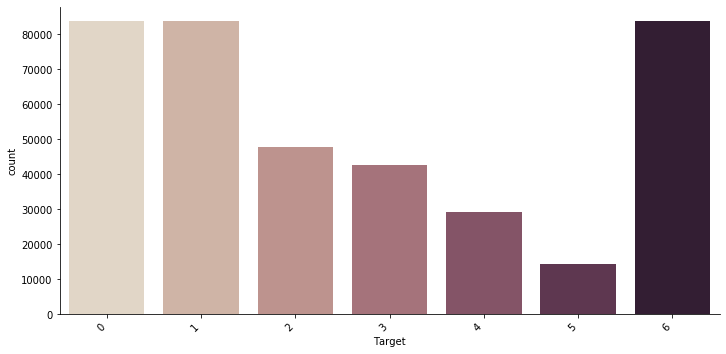

In [269]:
ax = sns.catplot(x="Target", kind="count", palette="ch:.25", data=strat_train_stores,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

In [0]:
X_train_store = strat_train_stores[['Day','Month','Customer_ID','Dwell_Time','Store_ID','Sequence_Num_New',1,2,3,4,5,6]]

In [0]:
y_train_store = strat_train_stores[['Target']]

In [0]:
X_test_store = strat_test_stores[['Day','Month','Customer_ID','Dwell_Time','Store_ID','Sequence_Num_New',1,2,3,4,5,6]]

In [0]:
y_test_store = strat_test_stores[['Target']]

In [0]:
clf2 = tree.DecisionTreeClassifier(max_depth = 12,random_state=42)

In [0]:
clf2 = clf2.fit(X_train_store,y_train_store)

In [0]:
y_pred_dt2 = clf2.predict(X_test_store)

In [325]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_store, y_pred_dt2)

array([[56028, 25585,   864,  3019,   201,    10, 39749],
       [ 4486,  7594,   101,   565,     9,     1,  8161],
       [ 3618,  2469,    98,   354,     7,     0,  5388],
       [ 2561,  1979,    75,   889,     6,     0,  5185],
       [ 2016,  1710,    37,   172,    19,     0,  3375],
       [  340,   301,     4,    54,     3,  2231,   662],
       [47451, 34100,   896,  5439,   159,    13, 68989]])

In [326]:
from sklearn.metrics import classification_report

print(classification_report(y_test_store, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.48      0.45      0.46    125456
           1       0.10      0.36      0.16     20917
           2       0.05      0.01      0.01     11934
           3       0.08      0.08      0.08     10695
           4       0.05      0.00      0.00      7329
           5       0.99      0.62      0.76      3595
           6       0.52      0.44      0.48    157047

    accuracy                           0.40    336973
   macro avg       0.33      0.28      0.28    336973
weighted avg       0.45      0.40      0.42    336973



In [321]:
from sklearn.metrics import accuracy_score
print("Accuracy = {:.2f}".format(accuracy_score(y_test_store, y_pred_dt2)))

Accuracy = 0.44


In [0]:
score = rnd_clf_history.score(X_train_store, y_train_store)
score2 = rnd_clf_history.score(X_test_store, y_test_store)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.317
Test set accuracy:  0.441


In [0]:
y_pred_stores = rnd_clf_history.predict(X_test_store)
print(classification_report(y_test_store,y_pred_stores))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.49      0.46      0.47    125456
           1       0.12      0.30      0.17     20917
           2       0.00      0.00      0.00     11934
           3       0.09      0.08      0.09     10695
           4       0.20      0.00      0.00      7329
           5       1.00      0.62      0.77      3595
           6       0.52      0.52      0.52    157047

    accuracy                           0.44    336973
   macro avg       0.35      0.28      0.29    336973
weighted avg       0.45      0.44      0.44    336973



In [0]:
df_one_hot_comb_no_exit = df_one_hot_comb[df_one_hot_comb['Target']!=0]

In [0]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=1)

for train_index, test_index in split.split(df_one_hot_comb_no_exit, df_one_hot_comb_no_exit['Target']):
  strat_train_stores = df_one_hot_comb_no_exit.iloc[train_index]
  strat_test_stores = df_one_hot_comb_no_exit.iloc[test_index]

In [0]:
strat_train_stores

,Customer_ID,Store_ID,Dwell_Time,Day,Sequence_Num_New,Category_ID,Month,Target,1,2,3,4,5,6
500370,314402,6,9,3.0,1,4,3.0,6,0,0,0,0,0,1
346790,425560,3,49,6.0,2,8,5.0,6,0,0,2,0,0,0
477595,6925,6,25,4.0,33,18,6.0,6,0,0,0,0,0,1
1024947,138650,6,25,4.0,2,1,2.0,6,0,0,0,0,0,2
1025522,181397,6,20,4.0,1,1,2.0,6,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000415,266360,6,9,1.0,4,5,3.0,6,0,0,0,0,0,4
757373,103540,6,95,0.0,1,3,1.0,2,0,0,0,0,0,1
355852,468281,3,20,5.0,1,8,6.0,6,0,0,1,0,0,0
491746,50358,6,8,0.0,8,5,2.0,6,0,0,0,0,0,2


In [0]:
df_majority = strat_train_stores[strat_train_stores['Target']==6]
df_minority = strat_train_stores[strat_train_stores['Target']==1]


df_majority_6_downsampled = resample(df_majority, 
                                 replace=False,     
                                 n_samples=len(df_minority),   
                                 random_state=42) 

In [0]:
strat_train_stores = strat_train_stores[strat_train_stores['Target']!=6]

In [0]:
strat_train_stores = pd.concat([strat_train_stores,df_majority_6_downsampled])

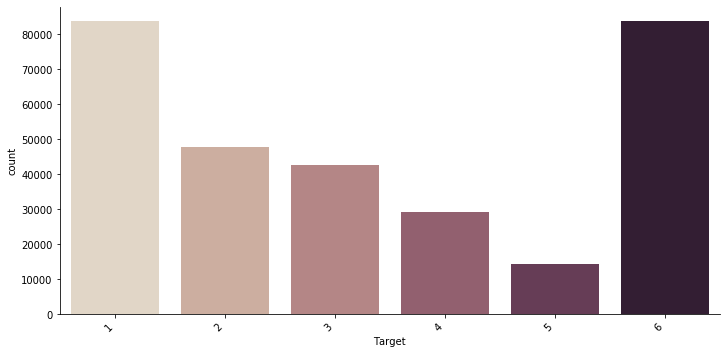

In [0]:
ax = sns.catplot(x="Target", kind="count", palette="ch:.25", data=strat_train_stores,height=5, aspect=2)
ax.set_xticklabels( rotation=45, horizontalalignment='right')

In [0]:
strat_train_stores = shuffle(strat_train_stores)

In [0]:
X_train_store = strat_train_stores[['Day','Month','Dwell_Time','Store_ID','Sequence_Num_New','Category_ID',1,2,3,4,5,6]]

In [0]:
y_train_store = strat_train_stores[['Target']]

In [0]:
X_test_store = strat_test_stores[['Day','Month','Dwell_Time','Store_ID','Sequence_Num_New','Category_ID',1,2,3,4,5,6]]

In [0]:
y_test_store = strat_test_stores[['Target']]

In [0]:
rnd_clf_history_no_exit = RandomForestClassifier(n_estimators=500, max_depth=10,n_jobs=-1,random_state=6,criterion='entropy')
rnd_clf_history_no_exit.fit(X_train_store,y_train_store)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [0]:
score = rnd_clf_history_no_exit.score(X_train_store, y_train_store)
score2 = rnd_clf_history_no_exit.score(X_test_store, y_test_store)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.378
Test set accuracy:  0.581


In [0]:
y_pred_stores = rnd_clf_history_no_exit.predict(X_test_store)
print(classification_report(y_test_store,y_pred_stores))

              precision    recall  f1-score   support

           1       0.16      0.42      0.23     20917
           2       0.13      0.01      0.02     11934
           3       0.12      0.09      0.10     10695
           4       0.24      0.15      0.19      7329
           5       1.00      0.61      0.76      3595
           6       0.78      0.70      0.74    157048

    accuracy                           0.58    211518
   macro avg       0.40      0.33      0.34    211518
weighted avg       0.63      0.58      0.60    211518

